In [2]:
import matplotlib.pyplot as plt

import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize']=(20,5)
import csv



In [21]:
df=pd.read_csv('C:\\Users\danzengy\Southern\hotel_bookings.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

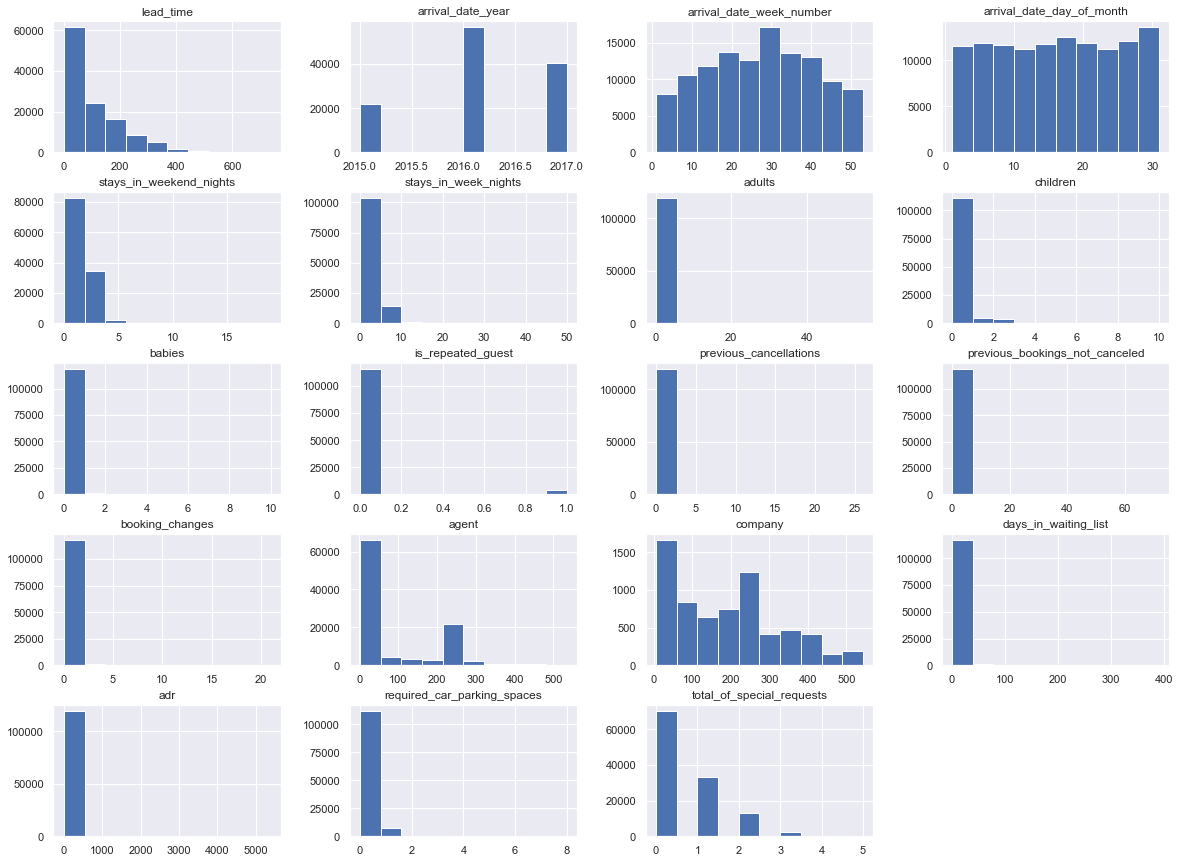

In [69]:
data.hist(figsize=(20,15))
plt.show()

In [ ]:
Insight: This is just a quick glance of the different columns how we can dive deeper into any of these datasets

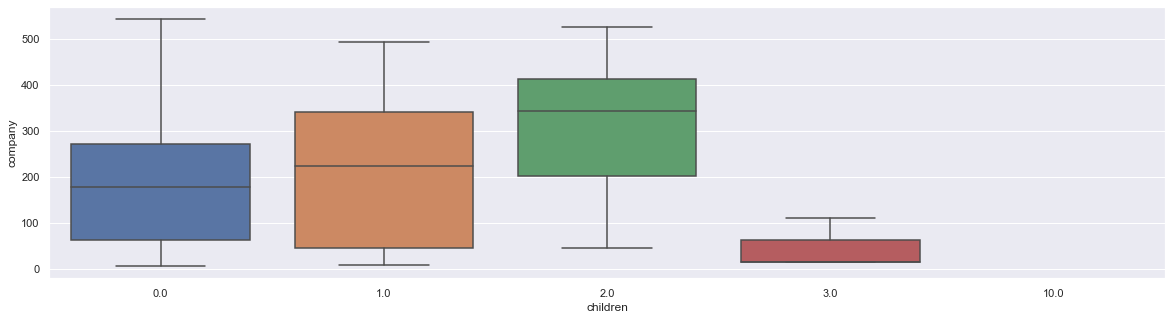

<Figure size 1440x720 with 0 Axes>

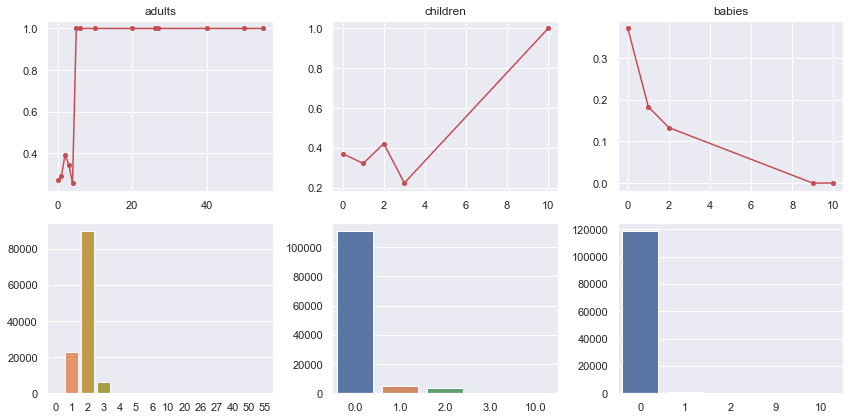

In [82]:
sns.boxplot(x='children',y='company',data=df)
plt.figure(figsize=(20, 10))

plt.figure(figsize=(12, 6))
index = 0
for i in ['adults', 'children', 'babies']:
    index += 1
    plt.subplot(2, 3, index)
    plt.plot(df.groupby(i)['is_canceled'].mean(),
             'ro-',
             ms=4)
    plt.title(i)

    plt.subplot(2, 3, index + 3)
    x = df[i].value_counts()
    sns.barplot(x=x.index, y=x.values)
plt.tight_layout()
plt.show()

In [ ]:
#INSIGHT: Most hotels see an average of one child per booking and having 3 or more is uncommon.
Two adults is also the most popular type of bookings with 1 and 3 coming in next respectfully.
Booking a room with a baby is very uncommon.

<AxesSubplot:xlabel='adults', ylabel='company'>

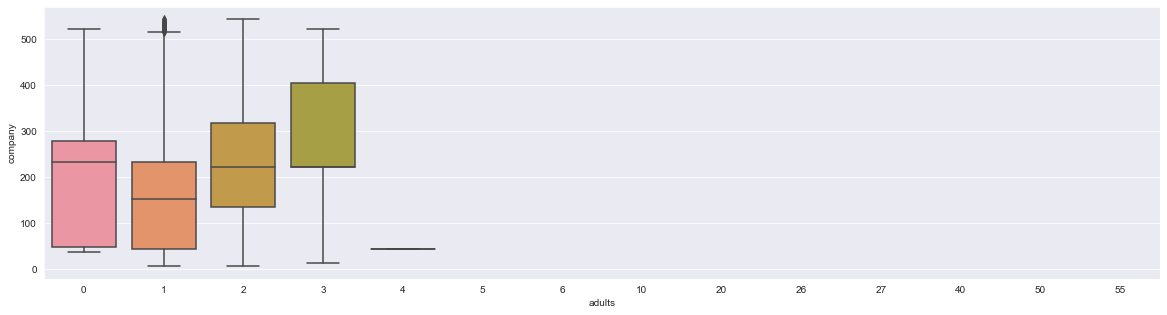

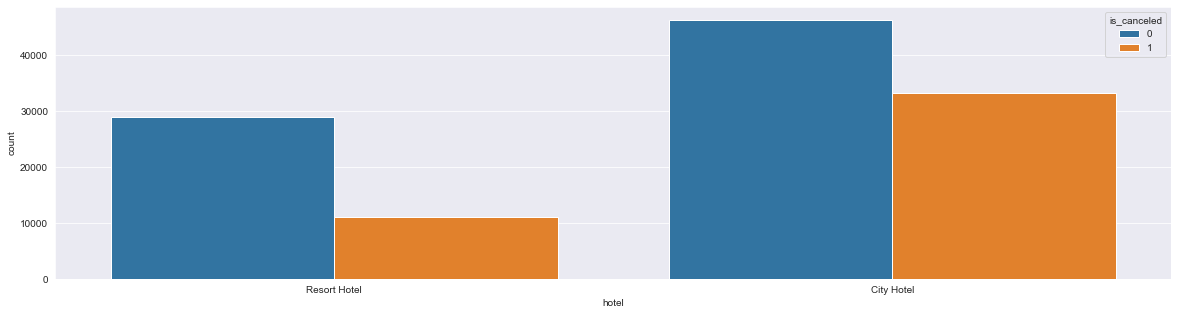

In [22]:
sns.countplot(x=df['hotel'], hue=df['is_canceled'])
plt.show()

In [ ]:
Insight: we can see that hotel cancellations is pretty common and that more than half of the hotels reserverd in the city are cancelled.

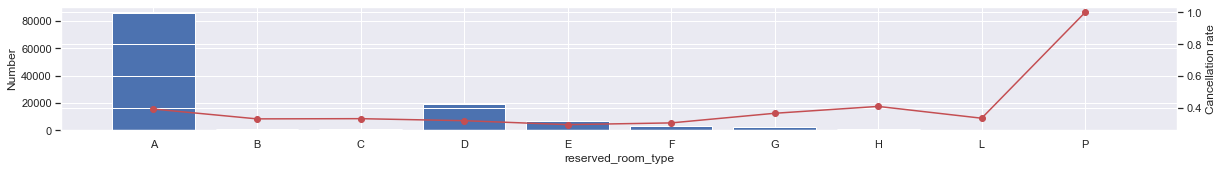

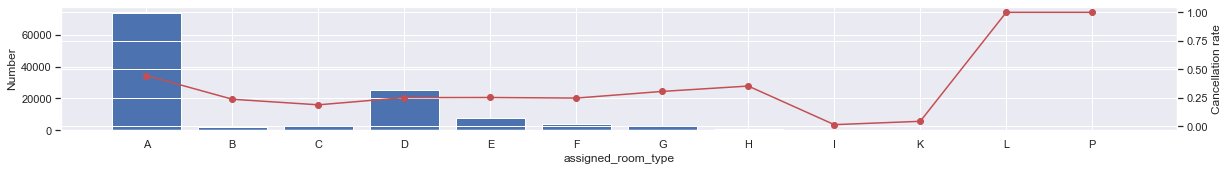

In [77]:
index = 1
for room in ['reserved_room_type', 'assigned_room_type']:
    ax1 = plt.subplot(2, 1, index)
    ax2 = ax1.twinx()
    ax1.bar(
        df.groupby(room).size().index,
        df.groupby(room).size())
    ax1.set_xlabel(room)
    ax1.set_ylabel('Number')
    ax2.plot(
        df.groupby(room)['is_canceled'].mean(),'ro-')
    ax2.set_ylabel('Cancellation rate')
    plt.show()

In [ ]:
Insight: we can see that the most common type of rooms reserved are A and D and that they both have around 50% cancellation rate
and room types P, L, and H are the most uncommon types of hotel rooms.

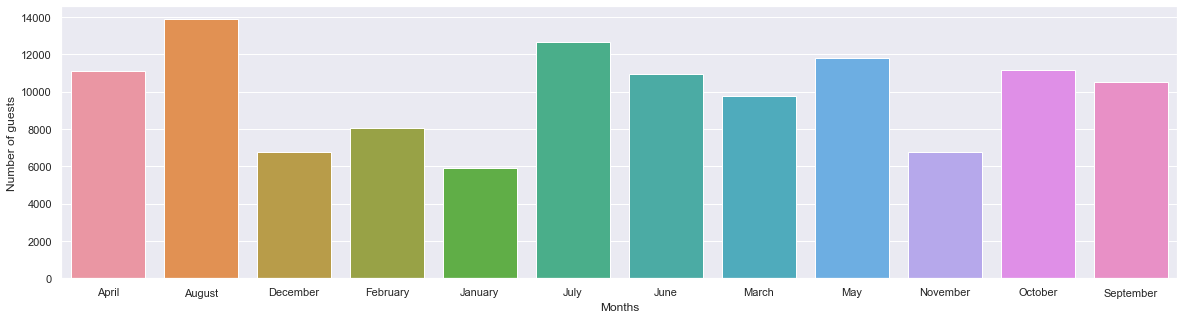

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

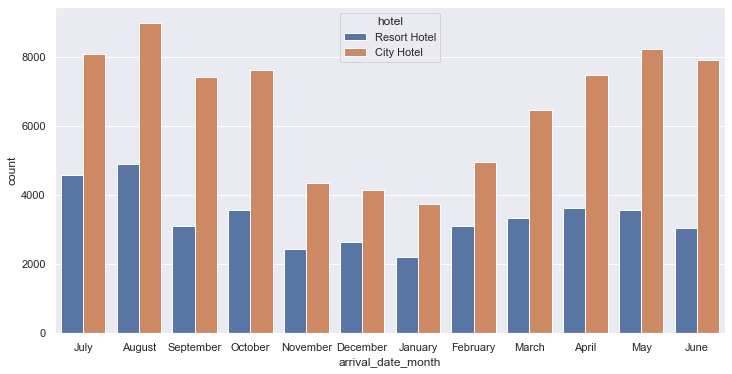

In [64]:
season = df.groupby("arrival_date_month")["hotel"].count()
months = season.index


sns.barplot(x=months, y=season)
plt.xlabel("Months")
plt.ylabel("Number of guests")

plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df , x='arrival_date_month', hue='hotel')

In [ ]:
Insight: The warmer months of Aguust, June, July are the most popular months of the year, while the colder months of November and January.
City resorts are also the type of hotel with the most bookings and it shares a similiar trend with city hotel in terms of bookings.

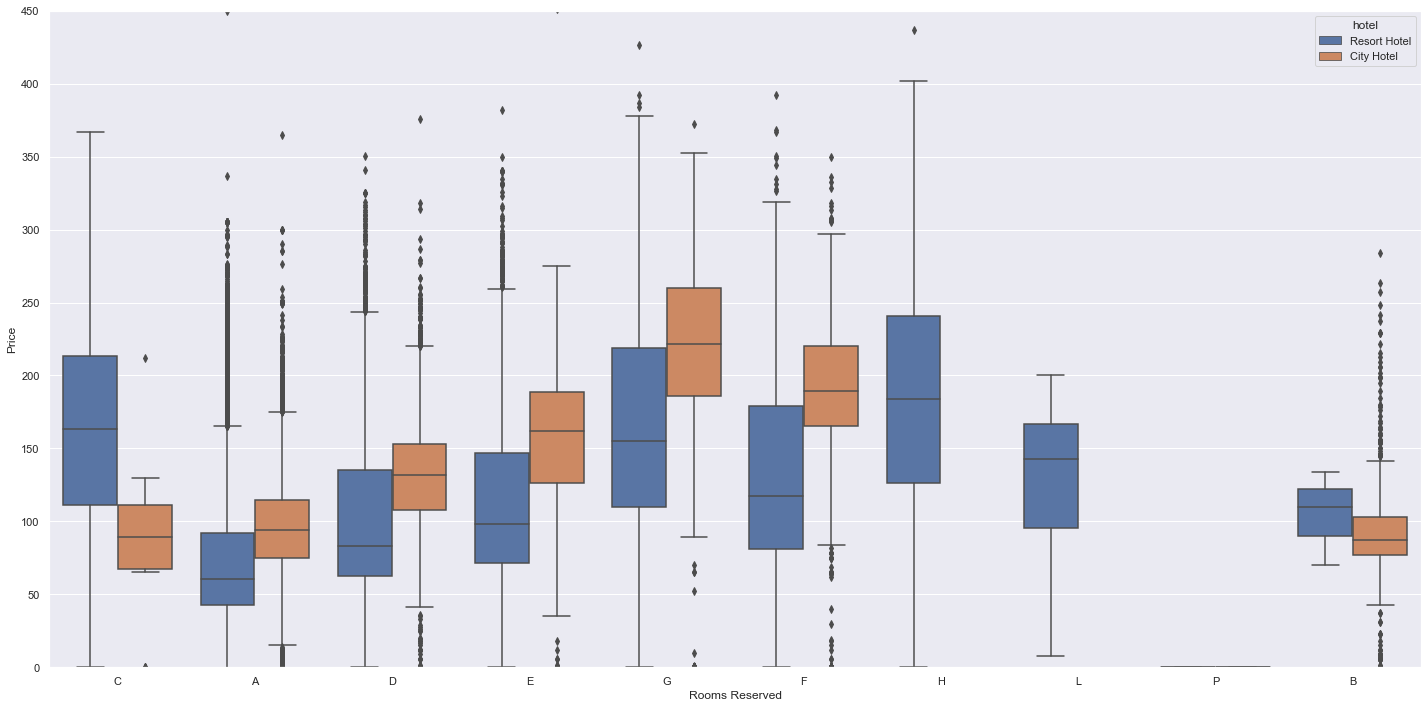

In [55]:

plt.figure(figsize=(20,10))
plt.xlim(0, 1000)
plt.ylim(0, 450)
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=df)
plt.xlabel('Rooms Reserved')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [ ]:
Insight: Room types H, G, and C have the highest volatility in prices hitting higher than other room types and sometimes sharing the same prices as other room types.

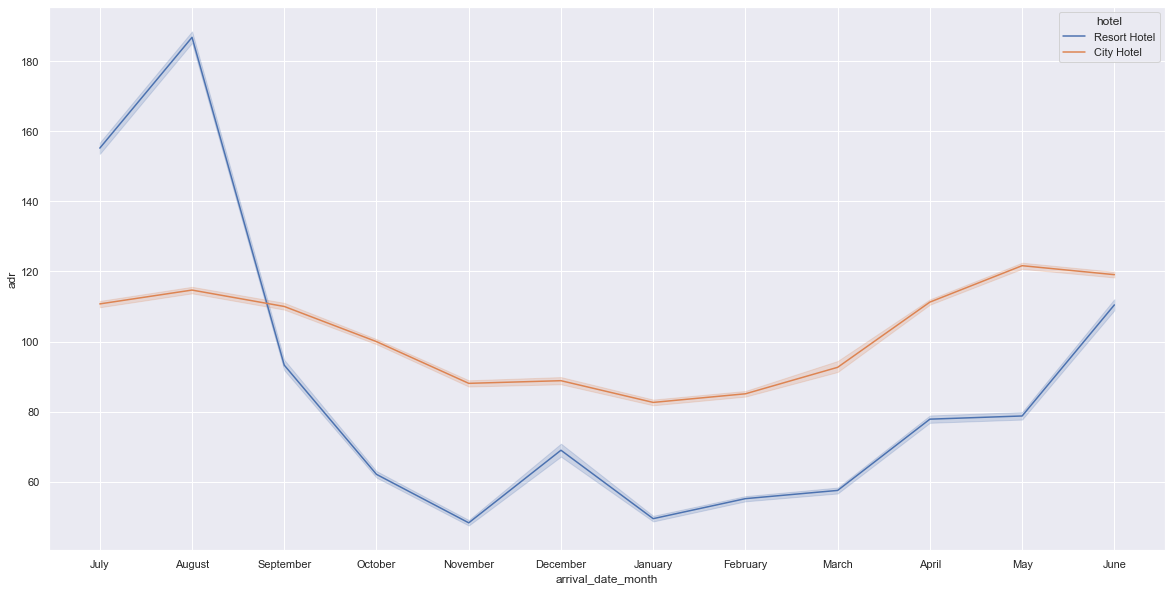

In [63]:
plt.figure(figsize=(20,10))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

In [ ]:
Insight: we can see from this graph that the highest prices are in August and it drops sharpely the next month. The lowest prices are in November and January.
    

<AxesSubplot:xlabel='hotel', ylabel='count'>

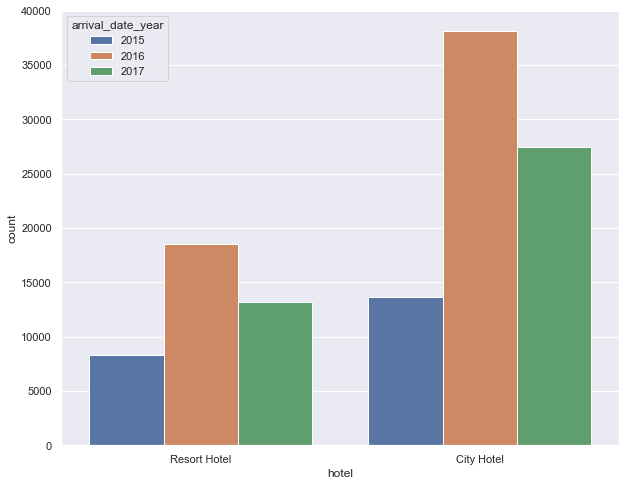

In [79]:
plt.figure(figsize=(10,8))
sns.countplot(x='hotel',hue='arrival_date_year',data=df)

In [ ]:
Insight: From this grpah we can see that over the past 3 years hotel booking growth is not guaranteed. Although it could have been projected to grow after a huge spike in 2016, hotel booking actually decreased but not to the level it used to be in 2015.